In [1]:
import os
import numpy as np
from astropy.table import Table
from astropy.io import fits

In [3]:
# -- plotting --
import matplotlib as mpl
import matplotlib.pyplot as plt 
import corner as dfm
import matplotlib.patches as mpatches
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
# read GSWLC data: https://salims.pages.iu.edu/gswlc/#catalog-download
# data column details: https://salims.pages.iu.edu/gswlc/table2.pdf
#fgswlc = os.path.join(os.environ['GALPOPFM_DIR'], 'obs', 'GSWLC-M2.dat')
#gswlc = np.loadtxt(fgswlc, unpack=True)
gswlc = np.loadtxt('/Users/tjitske/Documents/Projects/QuenchedIsolatedGalaxiesWorkshop/GSWLC-M2.dat', unpack = True)

In [4]:
logm = gswlc[9]
logsfr = gswlc[11]
logssfr = logsfr-logm
Av = gswlc[17]
sdssmain = gswlc[23]
plateid = gswlc[2]
fiberid = gswlc[4]
mjd = gswlc[3]
photoid = gswlc[0]

In [5]:
has_Av = (Av != -99.)
mlim = (logm > 10.)
sdss = (sdssmain == 1)

cuts = has_Av & mlim & sdss

is_q = (logsfr < logm - 11.5)
is_sf = (logsfr > logm - 11.5)

In [6]:
hdu = fits.open('/Users/tjitske/Documents/Projects/QuenchedIsolatedGalaxiesWorkshop/SDSSspectra/gal_info_dr7_v5_2.fit')
tab = hdu[1].data
t = Table([tab['plateid'], tab['spectrotype'], tab['fiberid'], tab['Z'], tab['mjd'], tab['photoid']],
              names = ('plateID', 'spectrotype','fiberID','redshift', 'MJD', 'photoID'))
select = (t['spectrotype'] == 'GALAXY')
print 'number of spectra in catalog: ', len(select), 'number of galaxy spectra: ', np.sum(select)
tselect = t[select]

hdu_class = fits.open('/Users/tjitske/Documents/Projects/QuenchedIsolatedGalaxiesWorkshop/SDSSspectra/gal_iclass_dr7_v5_2.fits')
classes = hdu_class[0].data
classes = classes[select]

hdu_indx = fits.open('/Users/tjitske/Documents/Projects/QuenchedIsolatedGalaxiesWorkshop/SDSSspectra/gal_indx_dr7_v5_2.fit')
tab_indx = hdu_indx[1].data
t_indx = Table([tab_indx['plateid'],tab_indx['fiberid'],tab_indx['tauv_cont'],tab_indx['model_chisq']], names = ('plateID','fiberID','tauV','chisq'))
tindx = t_indx[select]

number of spectra in catalog:  927552 number of galaxy spectra:  925892


In [7]:
sdss_SF_z03 = np.logical_and(classes == 1, tselect['redshift'] < 0.3)
print 'number of SF galaxies with z < 0.3:', np.sum(sdss_SF_z03)

number of SF galaxies with z < 0.3: 202014


In [8]:
gswlc_SF_Av = []
mpajhu_SF_Av = []
for i in range(np.sum(sdss_SF_z03)):
    assert tindx['plateID'][sdss_SF_z03][i] == tselect['plateID'][sdss_SF_z03][i]
    assert tindx['fiberID'][sdss_SF_z03][i] == tselect['fiberID'][sdss_SF_z03][i]
    inGSWLC = np.logical_and(plateid == tselect['plateID'][sdss_SF_z03][i], fiberid == tselect['fiberID'][sdss_SF_z03][i])
    if np.sum(inGSWLC) == 1:
        gswlc_SF_Av.append(Av[inGSWLC])
        mpajhu_SF_Av.append(tindx['tauV'][sdss_SF_z03][i]*1.086)
    #elif np.sum(inGSWLC) == 0:
    #    print i, 'not in GSWLC??', tselect['plateID'][i], tselect['fiberID'][i]
    elif np.sum(inGSWLC) > 1:
        print 'need to match mjd too'
        inGSWLC2 = np.logical_and(inGSWLC, mjd == tselect['MJD'][sdss_SF_z03][i])
        if np.sum(inGSWLC2) == 1:
            gswlc_SF_Av.append(Av[inGSWLC2])
            mpajhu_SF_Av.append(tindx['tauV'][sdss_SF_z03][i]*1.086)
        elif np.sum(inGSWLC2) > 1:
            print 'problem matching'
print 'number of SF galaxies with z < 0.3 in both MAP-JHU and GSWLC-2: ', len(gswlc_SF_Av), len(mpajhu_SF_Av)

need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
need to match mjd too
number of SF galaxies with z < 0.3 in both MAP-JHU and GSWLC-2:  81540 81540


In [46]:
gswlc_SF_Av = np.reshape(np.asarray(gswlc_SF_Av), (len(gswlc_SF_Av),))
mpajhu_SF_Av = np.asarray(mpajhu_SF_Av)

In [47]:
print gswlc_SF_Av[0:10], mpajhu_SF_Av[0:10]
print np.min(gswlc_SF_Av[0:10]), np.mean(gswlc_SF_Av[0:10]), np.median(gswlc_SF_Av[0:10]), np.max(gswlc_SF_Av[0:10])
print np.min(mpajhu_SF_Av[0:10]), np.mean(mpajhu_SF_Av[0:10]), np.median(mpajhu_SF_Av[0:10]), np.max(mpajhu_SF_Av[0:10])

[0.29  0.358 0.155 0.192 0.595 0.225 0.462 0.28  0.229 0.31 ] [0.03099965 0.82148172 2.23849287 2.00870892 1.71122358 1.60446346
 1.05924132 1.00207711 1.13319408 1.33591104]
0.155 0.3096 0.28500000000000003 0.595
0.030999653186649087 1.294579375287518 1.2345525562763213 2.238492871284485


(-1, 3)

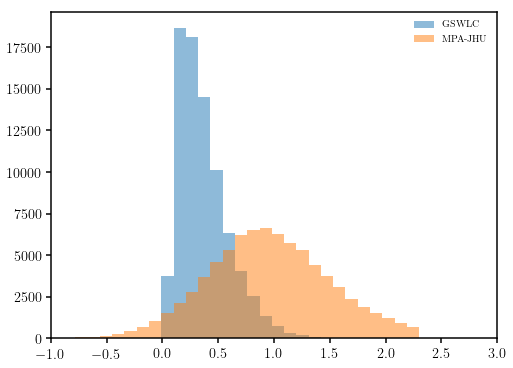

In [49]:
fig, ax = plt.subplots(1,1,figsize = [8,6])
ax.hist(gswlc_SF_Av, bins = 30, density = True, alpha = 0.5, range = [-1,2.3], label = 'GSWLC')
ax.hist(mpajhu_SF_Av, bins = 30, density = True, alpha = 0.5, range = [-1,2.3], label = 'MPA-JHU')
ax.legend()
ax.set_xlim(0,4)

In [68]:
import h5py as h5
f = h5.File('/Users/tjitske/Documents/Projects/QuenchedIsolatedGalaxiesWorkshop/DATA/tinker_SDSS_centrals_M9.7.valueadd.hdf5','r')
av_nsa = f['AV'][:]
nsa_plateid = f['PLATE'][:]
nsa_fiberid = f['FIBERID'][:]
nsa_MJD = f['MJD'][:]
f.close()
print av_nsa.size

av_nsa_match = []
av_gswlc = []
av_mpajhu = []
for i in range(av_nsa.size):
    inGSWLC = (plateid == nsa_plateid[i]) & (fiberid == nsa_fiberid[i]) & (mjd == nsa_MJD[i])
    inMPAJHU = (t['plateID'][:] == nsa_plateid[i]) & (t['fiberID'][:] == nsa_fiberid[i]) & (t['MJD'][:] == nsa_MJD[i])
    #if np.sum(inGSWLC) == 0 or np.sum(inMPAJHU) == 0:
        #print i, nsa_plateid[i], nsa_fiberid[i]
    #else:
    if np.sum(inGSWLC) > 0 and np.sum(inMPAJHU) > 0:
        #print nsa_plateid[i], plateid[inGSWLC][0], tselect['plateID'][inMPAJHU][0]
        #print nsa_fiberid[i], fiberid[inGSWLC][0], tselect['fiberID'][inMPAJHU][0]
        av_nsa_match.append(av_nsa[i])
        if np.sum(inGSWLC) == 1:
            av_gswlc.append(Av[inGSWLC][0])
        elif np.sum(inGSWLC) > 1:
            print 'problem matching to GSWLC'
        if np.sum(inMPAJHU) == 1:
            av_mpajhu.append(t_indx['tauV'][inMPAJHU][0]*1.086)
        elif np.sum(inMPAJHU) > 1:
            print 'problem matching to MPAJHU'
    if i % 1000 == 0: print i
    #elif np.sum(inGSWLC) == 0:
    #    print i, 'not in GSWLC??', tselect['plateID'][i], tselect['fiberID'][i]
    
print 'number of galaxies from Tinker sample in both MAP-JHU and GSWLC: ', len(av_nsa_match), len(av_gswlc), len(av_mpajhu)
    
av_gswlc = np.reshape(np.asarray(av_gswlc), (len(av_gswlc),))
av_mpajhu = np.asarray(av_mpajhu)


12344
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
number of galaxies from Tinker sample in both MAP-JHU and GSWLC:  5834 5834 5834


(-1, 3)

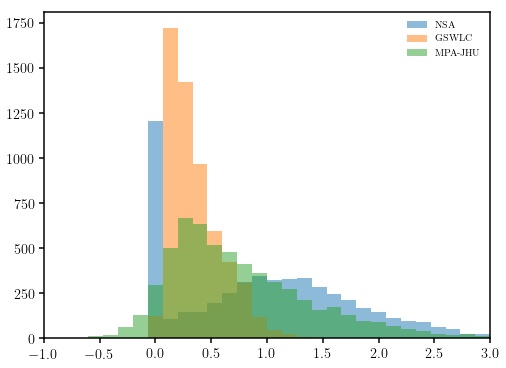

In [69]:

fig, ax = plt.subplots(1,1,figsize = [8,6])
ax.hist(av_nsa_match, bins = 30, alpha = 0.5, range = [-1,3], label = 'NSA')
ax.hist(av_gswlc, bins = 30, alpha = 0.5, range = [-1,3], label = 'GSWLC')
ax.hist(av_mpajhu, bins = 30, alpha = 0.5, range = [-1,3], label = 'MPA-JHU')
ax.legend()
ax.set_xlim(-1,3)